In [1]:
import numpy as np
np.set_printoptions(linewidth=200, precision=4) # to print wide matrices

import simphony
simphony.Config.set_platform('gpu')
simphony.Config.set_matplotlib_format('retina')

from matplotlib import pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 14})

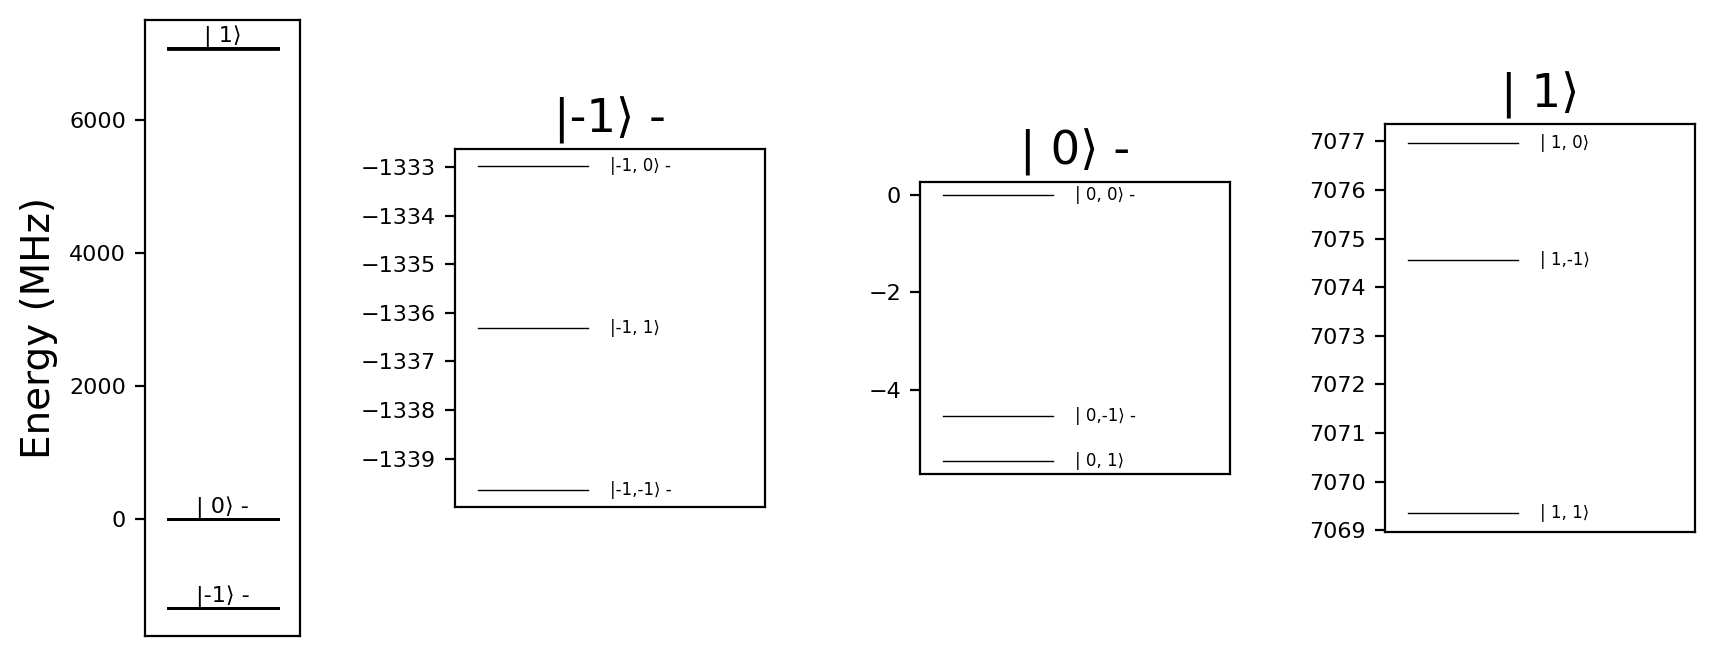

In [3]:
model = simphony.default_nv_model(nitrogen_isotope=14,
                                  static_field_strength=15e-2)
model.plot_levels()

In [4]:
def CPMG(model, wait, n, apply_noise=False, n_shots=1):
    
    duration = 0.01
    
    frequency = model.splitting_qubit('e', rest_quantum_nums={'N': 0})
    
    angle1 = np.pi / 2
    period_time1 = 2 * np.pi * duration / angle1
    angle2 = np.pi
    period_time2 = 2*np.pi*duration/angle2
    amplitude1 = model.rabi_cycle_amplitude_qubit(driving_field_name='MW_x',
                                                 period_time=period_time1,
                                                 spin_name='e')
    amplitude2 = model.rabi_cycle_amplitude_qubit(driving_field_name='MW_x',
                                                 period_time=period_time2,
                                                 spin_name='e')

    model.remove_all_pulses()
    model.driving_field('MW_x').add_rectangle_pulse(amplitude=amplitude1,
                                                    frequency=frequency,
                                                    phase=0,
                                                    duration=duration)
    for i in range(n):
        model.driving_field('MW_x').add_wait(wait)
        model.driving_field('MW_x').add_rectangle_pulse(amplitude=amplitude2,
                                                    frequency=frequency,
                                                    phase=np.pi/2,
                                                    duration=duration)
        if i !=n-1:
            model.driving_field('MW_x').add_wait(wait)
    model.driving_field('MW_x').add_wait(wait)
    model.driving_field('MW_x').add_rectangle_pulse(amplitude=amplitude1,
                                                    frequency=frequency,
                                                    phase=np.pi,
                                                    duration=duration)

    result = model.simulate_time_evolution(n_eval=512, apply_noise=apply_noise, n_shots=n_shots)
    model.plot_driving_fields()
    result.initial_state = model.productstate({'e': 0, 'N': 0})
    result.plot_Bloch_vectors()

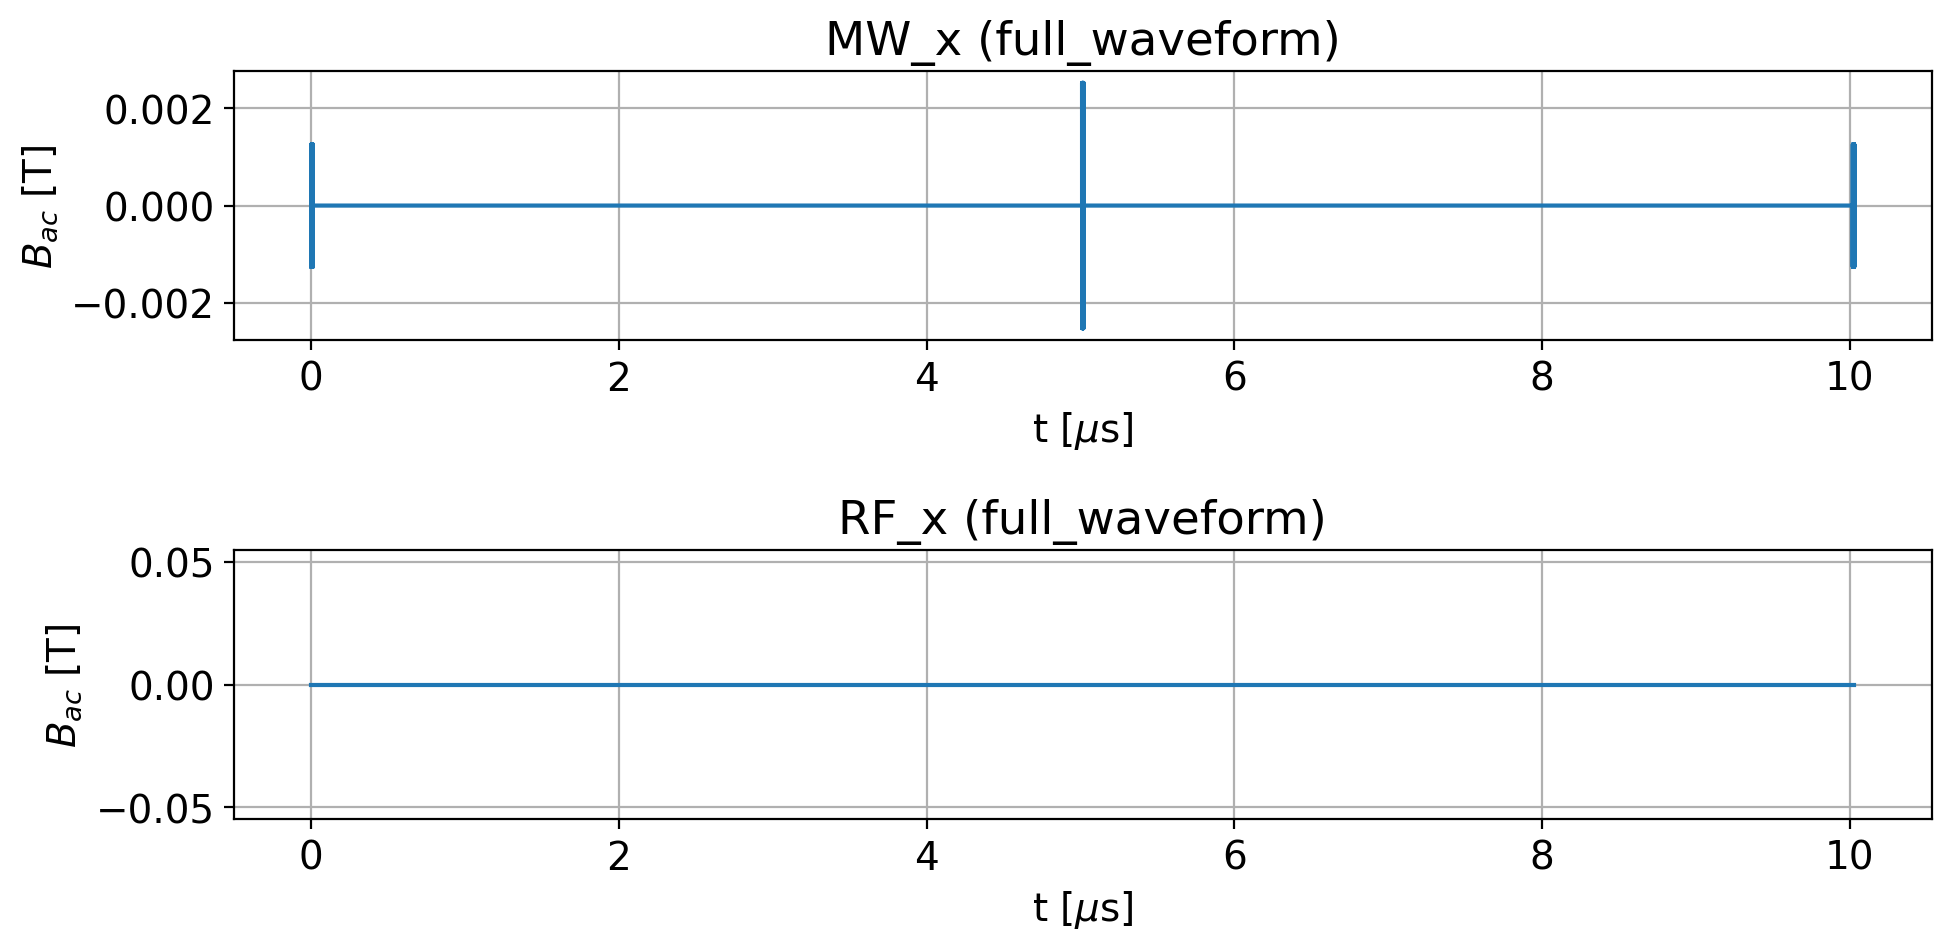

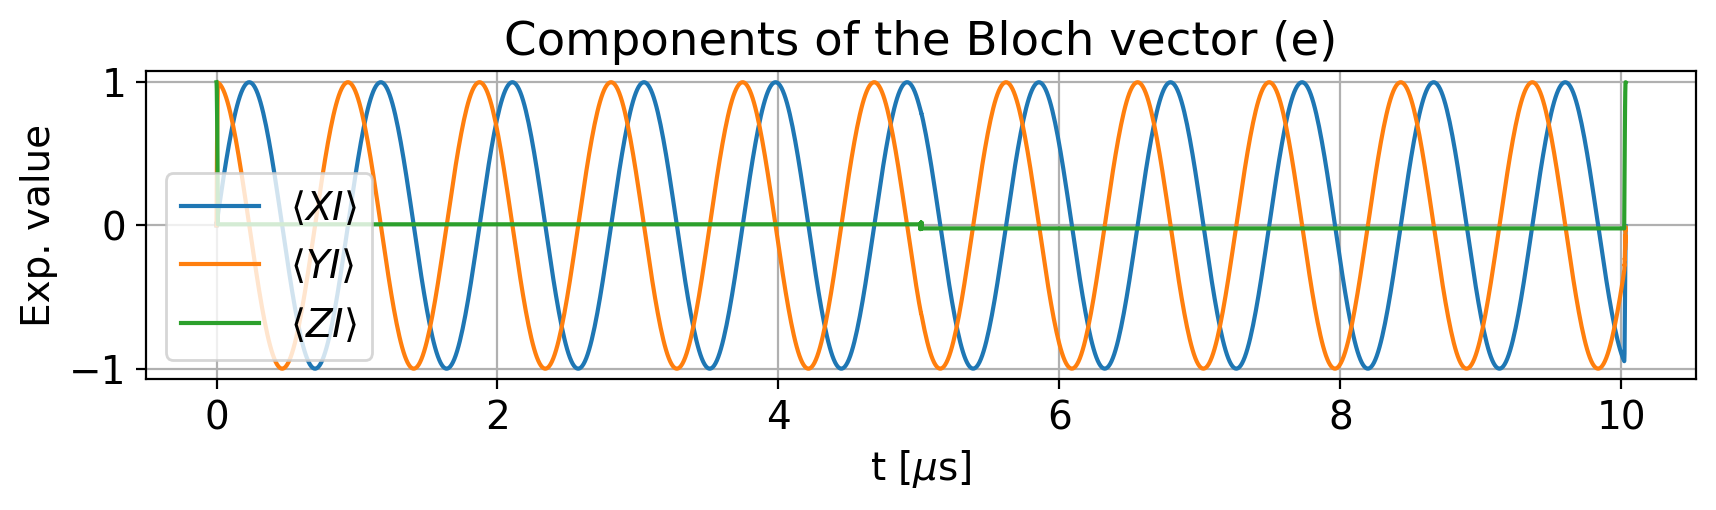

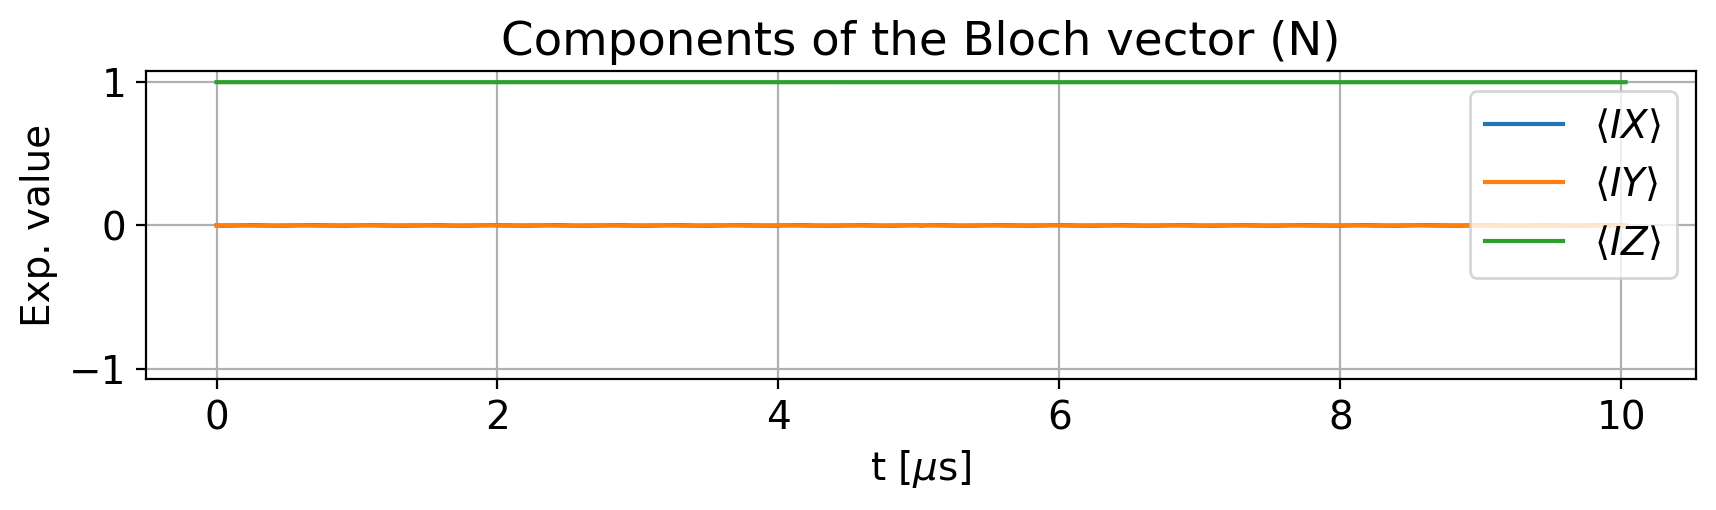

In [7]:
duration = 0.01
wait = 5 
frequency = model.splitting_qubit('e', rest_quantum_nums={'N': 0})

angle1 = np.pi / 2
period_time1 = 2 * np.pi * duration / angle1
angle2 = np.pi
period_time2 = 2*np.pi*duration/angle2
amplitude1 = model.rabi_cycle_amplitude_qubit(driving_field_name='MW_x',
                                                period_time=period_time1,
                                                spin_name='e')
amplitude2 = model.rabi_cycle_amplitude_qubit(driving_field_name='MW_x',
                                                period_time=period_time2,
                                                spin_name='e')

model.remove_all_pulses()
model.driving_field('MW_x').add_rectangle_pulse(amplitude=amplitude1,
                                                frequency=frequency,
                                                phase=0,
                                                duration=duration)
model.driving_field('MW_x').add_wait(wait)
model.driving_field('MW_x').add_rectangle_pulse(amplitude=amplitude2,
                                            frequency=frequency,
                                            phase=np.pi/2,
                                            duration=duration)
model.driving_field('MW_x').add_wait(wait)
model.driving_field('MW_x').add_rectangle_pulse(amplitude=amplitude1,
                                                frequency=frequency,
                                                phase=np.pi,
                                                duration=duration)

result = model.simulate_time_evolution(n_eval=512, apply_noise=False, n_shots=1)
model.plot_driving_fields()
result.initial_state = model.productstate({'e': 0, 'N': 0})
result.plot_Bloch_vectors()

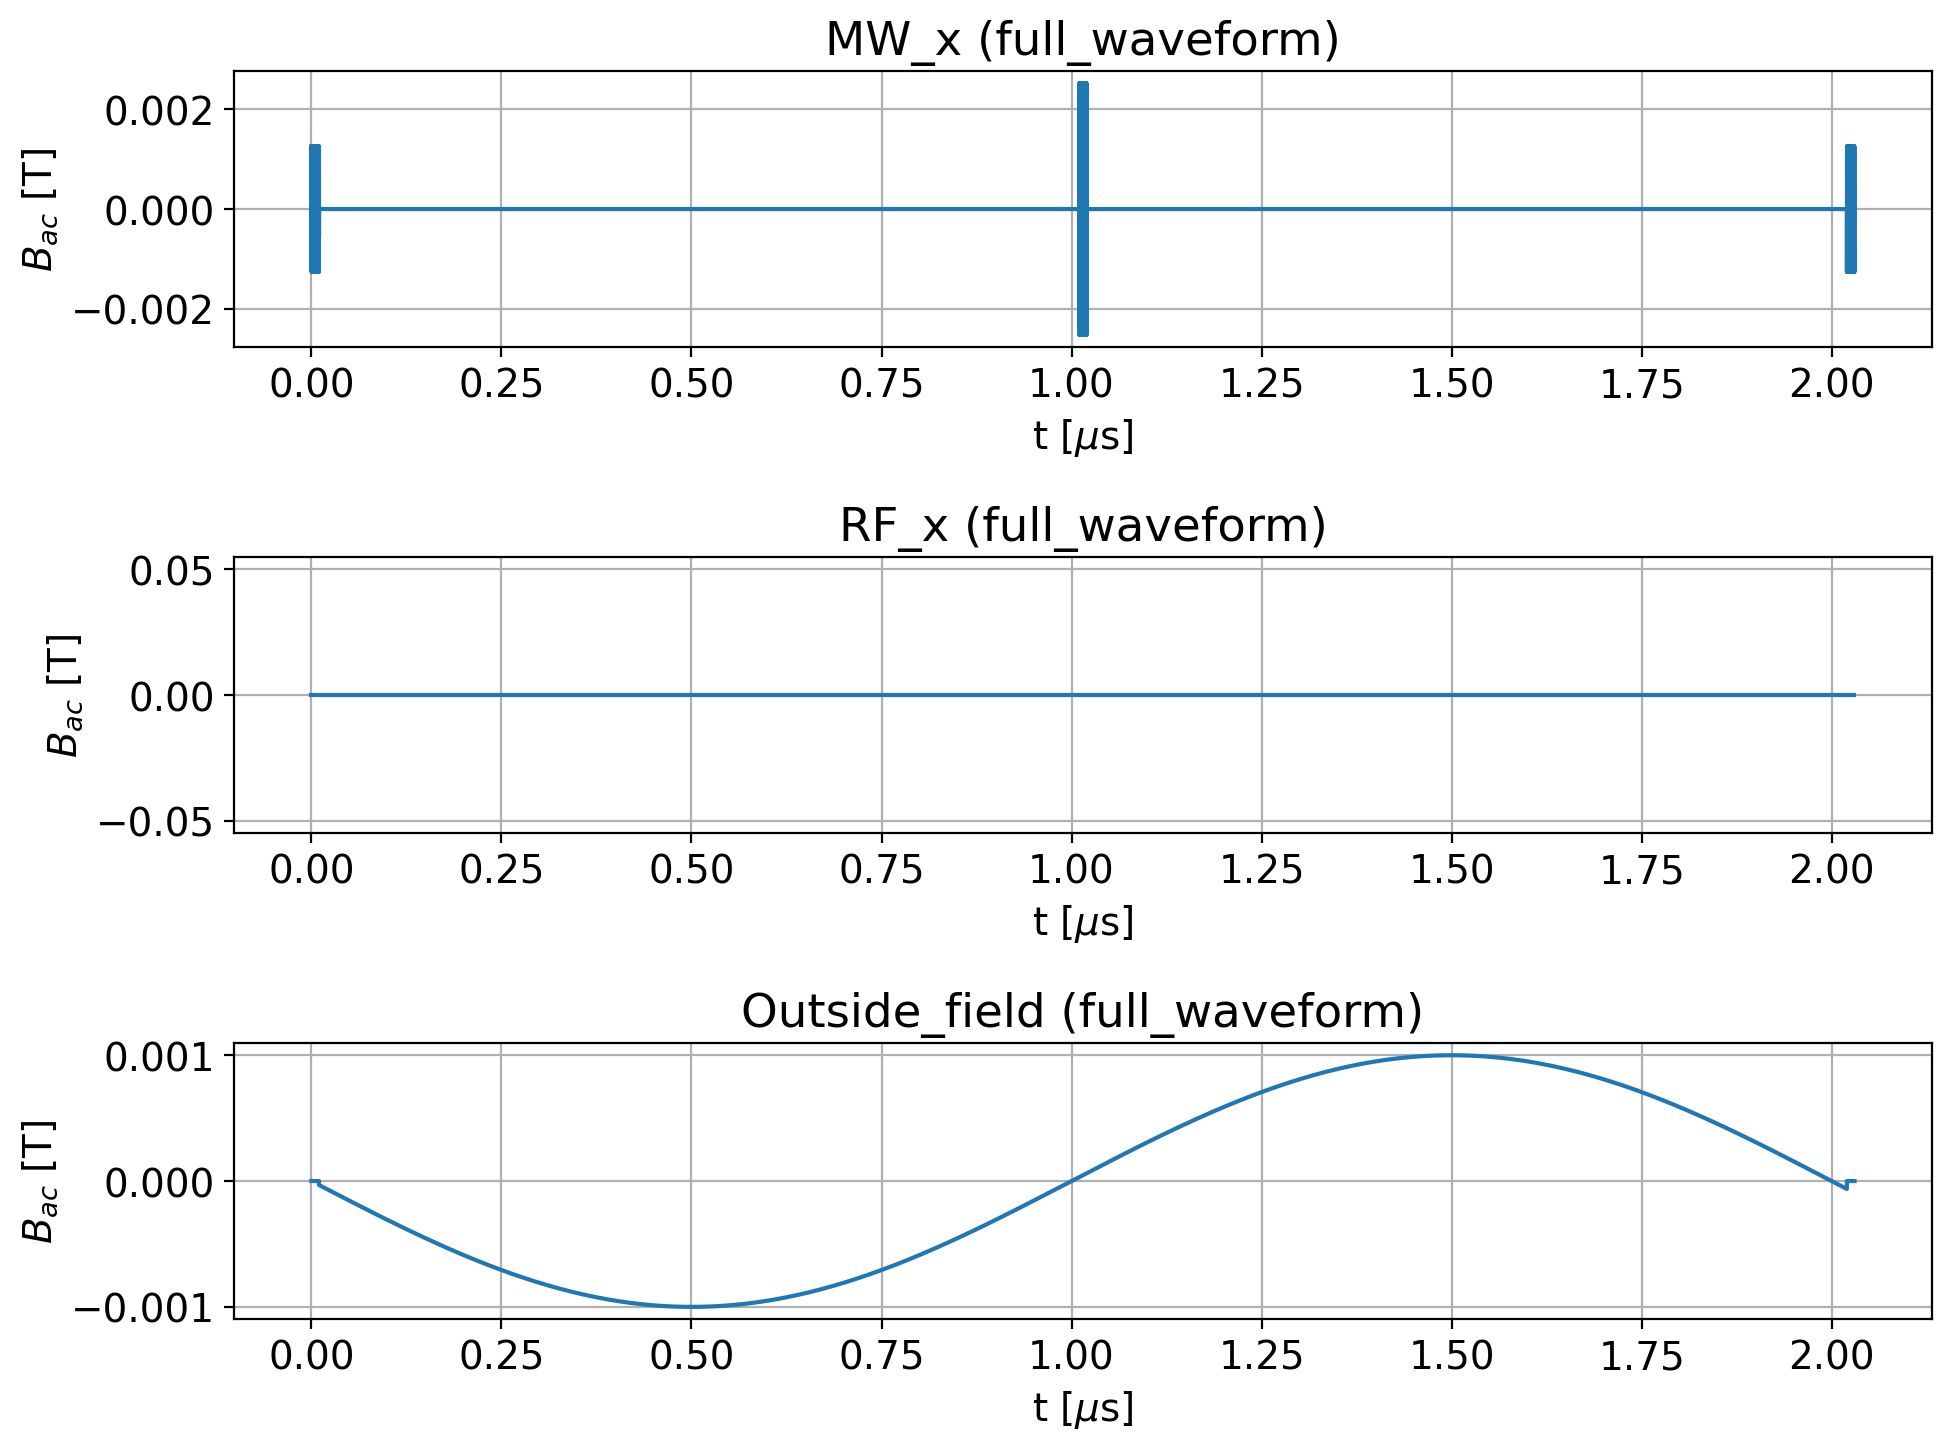

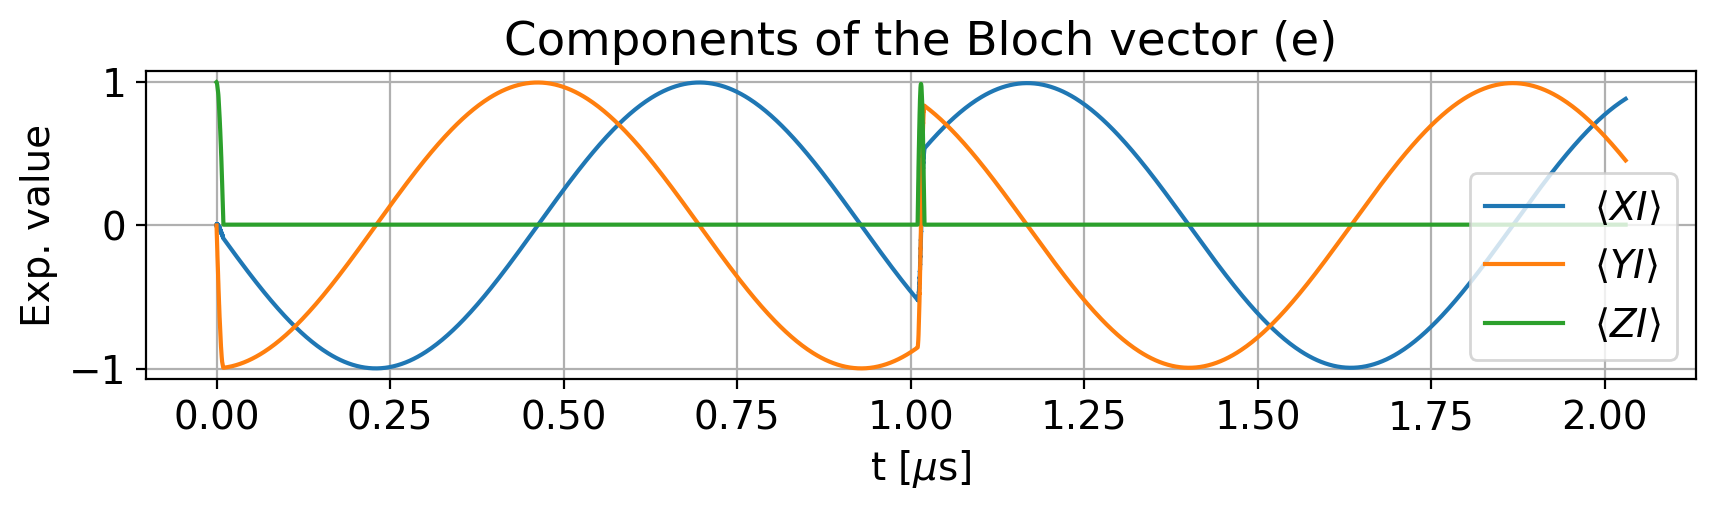

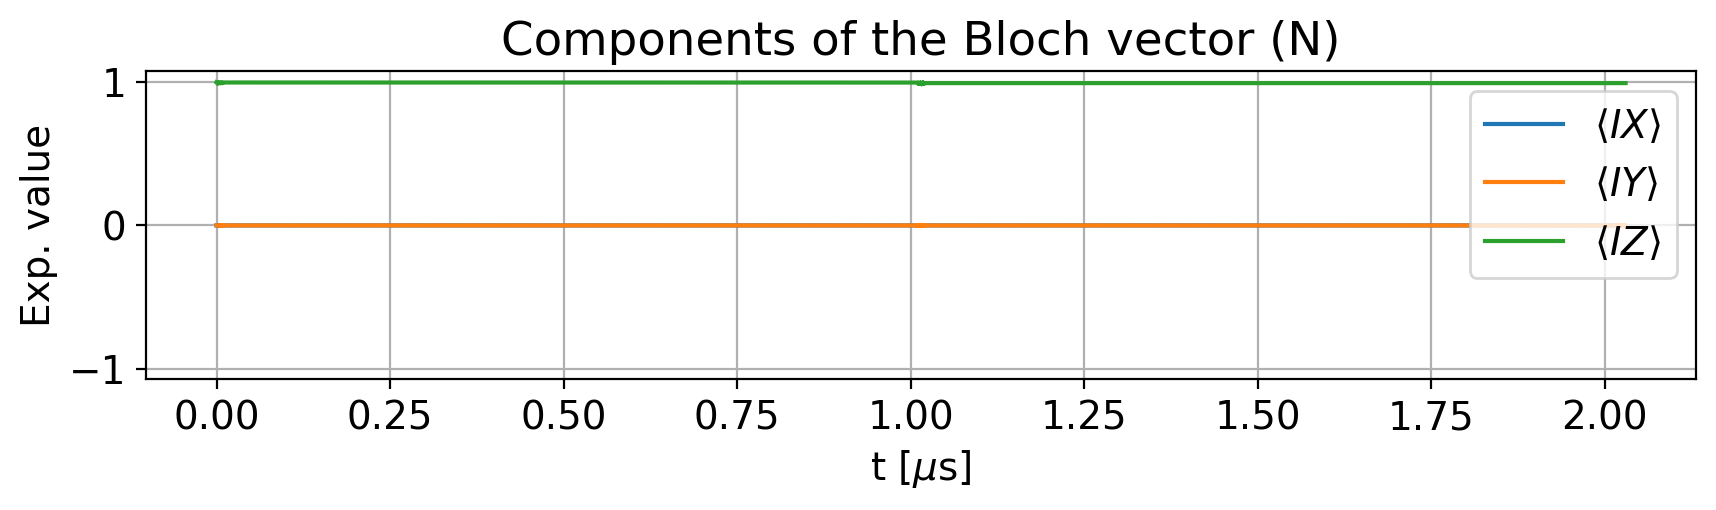

In [ ]:
model = simphony.default_nv_model(nitrogen_isotope=14, static_field_strength=0.005)
model.spin('e').local_quasistatic_noise.z = 0.1


outside_field = simphony.DrivingField(
    direction=[1, 0, 0],  
    name="Outside_field"
)
model.add_driving_field(outside_field)
tau_res = 1
frequency_target = 1/tau_res/2
B_ac =  1e-3
duration = 0.01  

frequency = model.splitting_qubit('e', rest_quantum_nums={'N': 0})

angle1 = np.pi / 2
period_time1 = 2 * np.pi * duration / angle1
angle2 = np.pi
period_time2 = 2 * np.pi * duration / angle2

amplitude1 = model.rabi_cycle_amplitude_qubit(
    driving_field_name='MW_x',
    period_time=period_time1,
    spin_name='e'
)
amplitude2 = model.rabi_cycle_amplitude_qubit(
    driving_field_name='MW_x',
    period_time=period_time2,
    spin_name='e'
)

complete_pulse_time = tau_res*2 +duration
model.remove_all_pulses()
model.driving_field('Outside_field').add_wait(duration)
model.driving_field('Outside_field').add_rectangle_pulse(amplitude=B_ac,
                                                            frequency=frequency_target,
                                                            phase=np.pi/2,
                                                            duration=complete_pulse_time)
model.driving_field('MW_x').add_rectangle_pulse(
    amplitude=amplitude1,
    frequency=frequency,
    phase=0,
    duration=duration
)

model.driving_field('MW_x').add_wait(tau_res)
model.driving_field('MW_x').add_rectangle_pulse(
    amplitude=amplitude2,
    frequency=frequency,
    phase=0,
    duration=duration
)

model.driving_field('MW_x').add_wait(tau_res)
model.driving_field('MW_x').add_rectangle_pulse(
    amplitude=amplitude1,
    frequency=frequency,
    phase=0, 
    duration=duration
)
result = model.simulate_time_evolution(n_eval=512, apply_noise=False, n_shots=1)
model.plot_driving_fields()
result.initial_state = model.productstate({'e': 0, 'N': 0})
result.plot_Bloch_vectors()